In [1]:
import tensorflow as tf
from tensorflow.keras import Input
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
training_set = tf.keras.preprocessing.image_dataset_from_directory('D:/Documents/Capstone/Project -2/Dataset/Full/train',
                                                             image_size = (224,224),
                                                             batch_size = 16,
                                                             label_mode = 'categorical')

Found 1852 files belonging to 11 classes.


In [4]:
testing_set = tf.keras.preprocessing.image_dataset_from_directory('D:/Documents/Capstone/Project -2/Dataset/Full/test',
                                                             image_size = (224,224),
                                                             batch_size = 16,
                                                             label_mode = 'categorical')

Found 910 files belonging to 11 classes.


In [5]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights = 'imagenet', include_top=False)
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [6]:
for layer in vgg.layers:
    layer.trainable = False

In [7]:
x = Flatten()(vgg.output)

In [8]:
prediction = Dense(11, activation='softmax')(x)

In [9]:
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
from keras import optimizers
from tensorflow.keras.optimizers import Adam

model.compile(loss = 'categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives()])

C:\Users\karma\.conda\envs\FarmwiseAI\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
epochs = 8
model_history = model.fit(training_set, 
                          validation_data=testing_set, 
                          epochs = epochs)

Epoch 1/8
116/116 [==============================] - 878s 7s/step - loss: 11.2665 - accuracy: 0.5567 - auc: 0.7840 - precision: 0.5574 - recall: 0.5556 - true_positives: 1029.0000 - val_loss: 11.4943 - val_accuracy: 0.6429 - val_auc: 0.8260 - val_precision: 0.6429 - val_recall: 0.6429 - val_true_positives: 585.0000
Epoch 2/8
116/116 [==============================] - 889s 8s/step - loss: 1.8373 - accuracy: 0.8796 - auc: 0.9529 - precision: 0.8801 - recall: 0.8796 - true_positives: 1629.0000 - val_loss: 12.2123 - val_accuracy: 0.6648 - val_auc: 0.8368 - val_precision: 0.6648 - val_recall: 0.6648 - val_true_positives: 605.0000
Epoch 3/8
116/116 [==============================] - 886s 8s/step - loss: 0.4340 - accuracy: 0.9638 - auc: 0.9884 - precision: 0.9638 - recall: 0.9638 - true_positives: 1785.0000 - val_loss: 11.6608 - val_accuracy: 0.6824 - val_auc: 0.8495 - val_precision: 0.6832 - val_recall: 0.6824 - val_true_positives: 621.0000
Epoch 4/8
116/116 [==============================] 

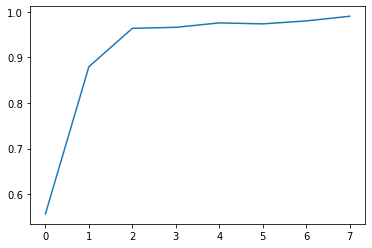

In [13]:
from matplotlib import pyplot
pyplot.plot(model_history.history['accuracy'])
pyplot.show()